In [194]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns

In [195]:
dataset = pd.read_excel('../awarie_transf_hist.xlsx')

In [196]:
dataset

,Status,PMLate,Overloads,MilesFromOcean,Manufacturer,WaterExposure,MultipleConnects,Storm,AssetType,Repairs,AssetId,AssetLocation,AssetCity,AssetState,AssetZip,Lat,Long,AvgRepairCost,Age
0,OK,N,60+,0-30,Other,No,Yes,No,1-Phase Pole Transformer,Rebuild+3,CE01059,371 VISTA CREEK DR,STOCKBRIDGE,GA,30281.0,33.516955,-84.257856,78851.30,70.3
1,OK,N,20-60,0-30,Schneider Electric,No,No,No,1-Phase Pole Transformer,Rebuild+2,JU02620,400 WOODSTONE DR,MARRIETTA,GA,30068.0,33.958526,-84.434630,78851.30,70.3
2,Failure,N,20-60,0-30,Other,No,No,No,1-Phase Pole Transformer,Original,QD01302,3150 GATEWAY DRIVE,NORCROSS,GA,30091.0,33.932520,-84.258085,55000.00,70.3
3,Failure,N,60+,0-30,Other,No,Yes,No,1-Phase Pole Transformer,Original,RC00547,120 CLIFFORD CT,STOCKBRIDGE,GA,30281.0,33.556129,-84.257950,78851.30,70.3
4,Failure,N,60+,0-30,Siemens,No,No,No,1-Phase Pole Transformer,Original,GO01571,10126 COMMONS XING,JONESBORO,GA,30238.0,33.478837,-84.354399,78851.30,70.3
5,Failure,N,60+,0-30,Schneider Electric,No,No,No,1-Phase Pole Transformer,Original,PV03821,3346 CEDAR ISLAND DRIVE,ATLANTA,GA,30311.0,33.738752,-84.498200,78851.30,70.3
6,Failure,N,60+,0-30,Siemens,No,No,No,1-Phase Pole Transformer,Original,BG00035,1040 GREENWOOD AVE #7,ATLANTA,GA,30306.0,33.776746,-84.353844,78851.30,70.3
7,OK,N,60+,More than 90,GE,Yes,No,No,DF-series Transformer,Rebuild+1,BI00850,1332 BENBROOKE LN NW,ACWORTH,GA,30101.0,33.985499,-84.735785,77000.00,67.9
8,OK,N,60+,More than 90,Other,No,Yes,No,DF-series Transformer,Original,PH00338,2888 MAPLE GROVE DR,REX,GA,30273.0,33.567242,-84.296295,83287.00,67.9
9,OK,N,60+,More than 90,Other,No,Yes,No,DF-series Transformer,Rebuild+2,DU01362,963 SCOTT CIRCLE,DECATUR,GA,30033.0,33.802501,-84.296000,83287.00,67.9


## Po analizie wstępnej danych, i przeczytaniu opisu danych z zadania, pierwszy podział danych wygląda następująco

In [197]:
y = ['Status'] #zmienna celu
numeryczne = ['AssetZip','Lat', 'Long', 'AvgRepairCost', 'Age']
binominalne = ['PMLate','WaterExposure','MultipleConnects', 'Storm'] #wartości Yes lub No, oraz Y lub N
nominalne = ['Manufacturer','AssetType','AssetCity']
porzadkowe = ['Overloads', 'MilesFromOcean','Repairs']
usun =['AssetId','AssetLocation', 'AssetState'] #zmienne nie brane w ogóle pod uwage

## Analiza zmiennych numerycznych, zelżności między nimi i zależności od zmiennej celu

In [198]:
def napraw_zipcode(x): #w kolumnie AssetZip zauważalne były niepoprawne = dłuższe o przypadkowe znaki , zostały przycięte i przekształcone do liczby
    x = str(x)
    x = x[:5]
    return int(x)

In [199]:
dane_num = pd.DataFrame()

In [200]:
for element in numeryczne:
    if element == 'AssetZip':
        dane_num[element] = dataset[element].apply(napraw_zipcode)
    else:
        dane_num[element] = dataset[element]

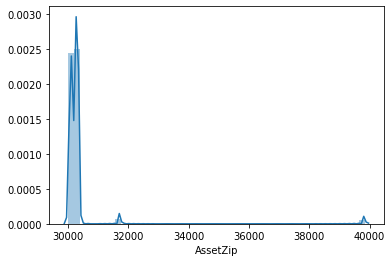

In [201]:
sns.distplot(dane_num['AssetZip'])

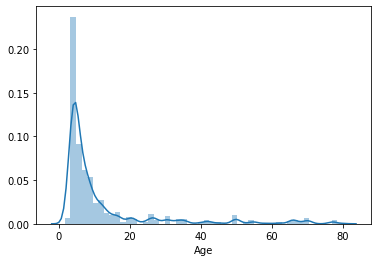

In [202]:
sns.distplot(dane_num['Age'])

In [203]:
dane_num['Age_log10'] = [np.log10(x) for x in dane_num['Age']]

In [204]:
dane_num['Age_log2'] = [np.log2(x) for x in dane_num['Age']]

In [205]:
dane_num['Age_ln'] = [np.log(x) for x in dane_num['Age']]

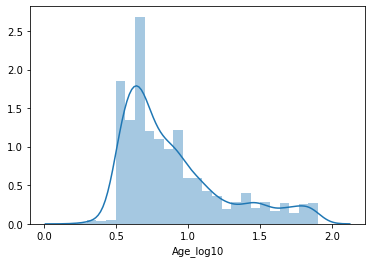

In [206]:
sns.distplot(dane_num['Age_log10'])

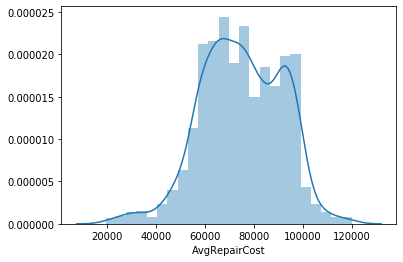

In [207]:
sns.distplot(dane_num['AvgRepairCost'])

In [208]:
dane_num['AvgRepairCost_log10'] = [np.log10(x) for x in dane_num['AvgRepairCost']]

In [209]:
dane_num['AvgRepairCost_sqrt'] = [np.sqrt(x) for x in dane_num['AvgRepairCost']]

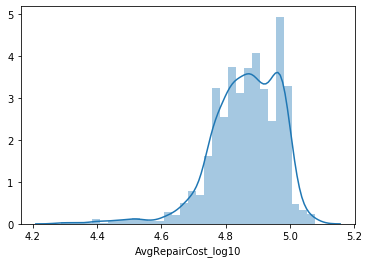

In [210]:
sns.distplot(dane_num['AvgRepairCost_log10'])

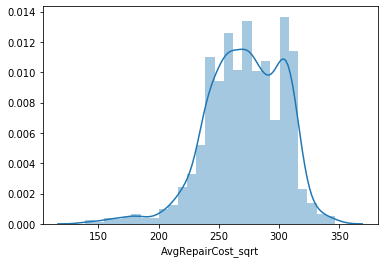

In [211]:
sns.distplot(dane_num['AvgRepairCost_sqrt'])

In [212]:
dane_num['status'] = dataset['Status']

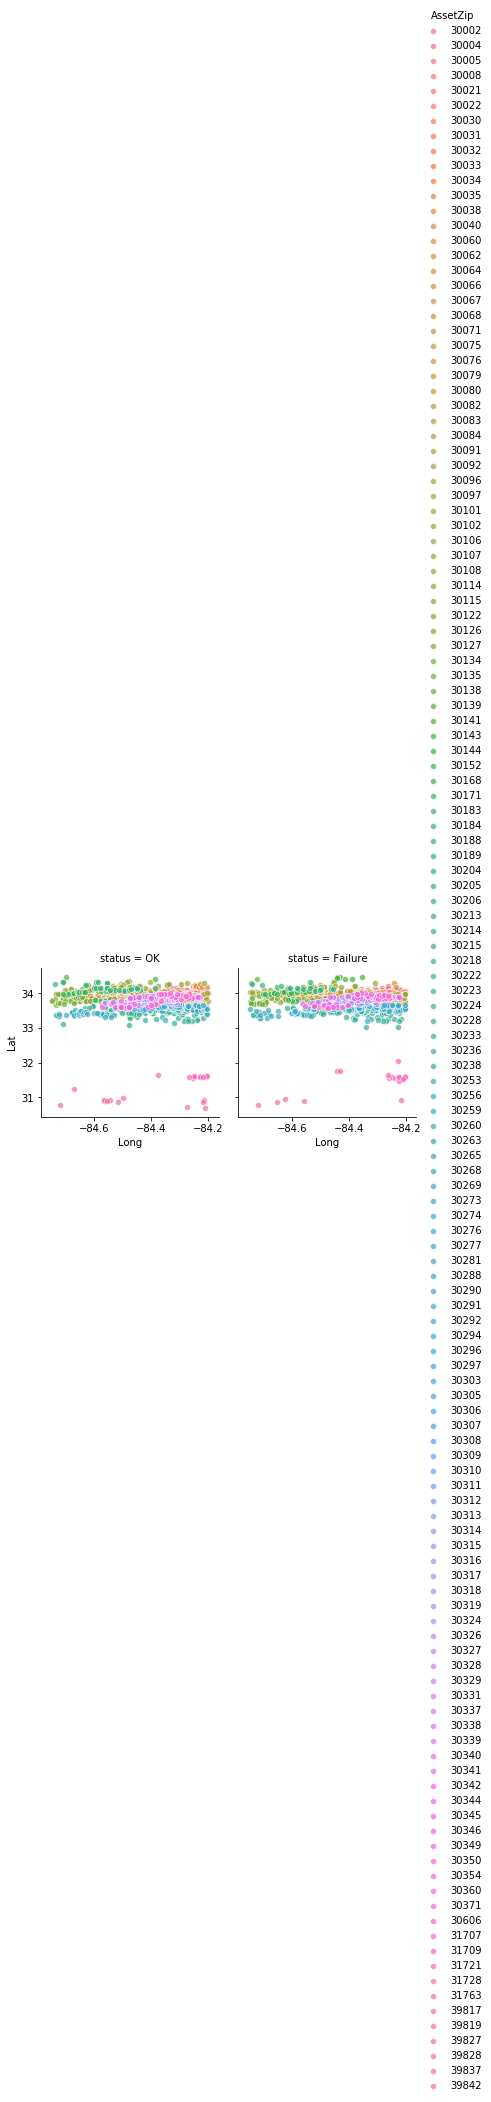

In [213]:
g = sns.FacetGrid(dane_num, col="status", hue="AssetZip")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

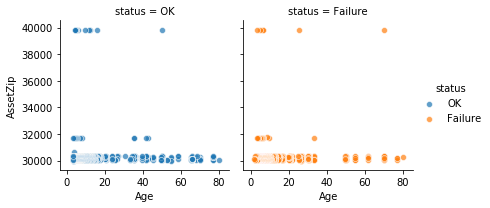

In [214]:
g = sns.FacetGrid(dane_num, col="status", hue="status")
g.map(sns.scatterplot, "Age", "AssetZip", alpha=.7)
g.add_legend()

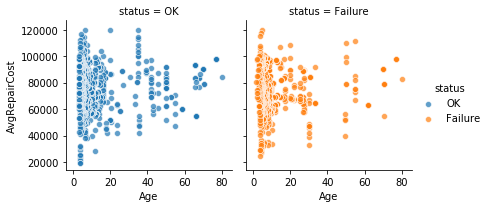

In [215]:
g = sns.FacetGrid(dane_num, col="status", hue="status")
g.map(sns.scatterplot, "Age", "AvgRepairCost", alpha=.7)
g.add_legend()

## Przekształcenia i analiza danych binominalnych
## binominalne = ['PMLate','WaterExposure','MultipleConnects', 'Storm']

In [216]:
dane_bin = pd.DataFrame()
def zamiana_binominalnych(x):
    if x.lower() == 'y' or x.lower() == 'yes':
        return 1
    else:
        return 0
for element in binominalne:
    dane_bin[element] = dataset[element].apply(zamiana_binominalnych)

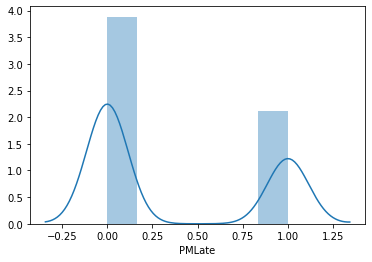

In [217]:
sns.distplot(dane_bin['PMLate'])

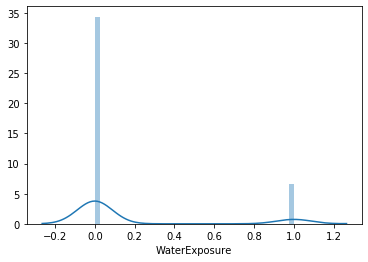

In [218]:
sns.distplot(dane_bin['WaterExposure'])

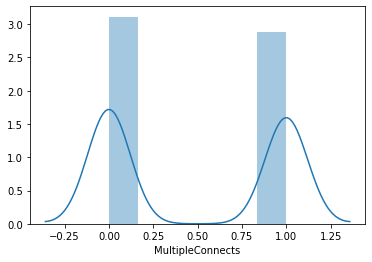

In [219]:
sns.distplot(dane_bin['MultipleConnects'])

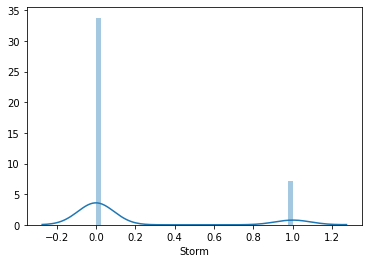

In [220]:
sns.distplot(dane_bin['Storm'])

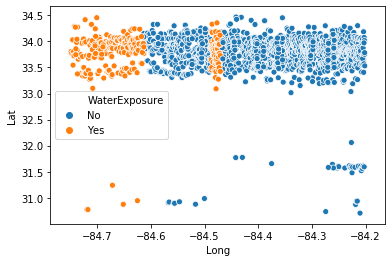

In [225]:
sns.scatterplot(data=dataset, x='Long', y='Lat', hue='WaterExposure')

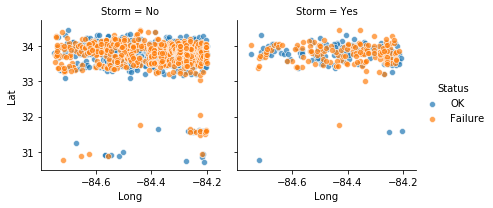

In [221]:
g = sns.FacetGrid(dataset, col="Storm", hue="Status")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

In [77]:
dataset['Storm'].value_counts()


No     1414
Yes     302
Name: Storm, dtype: int64

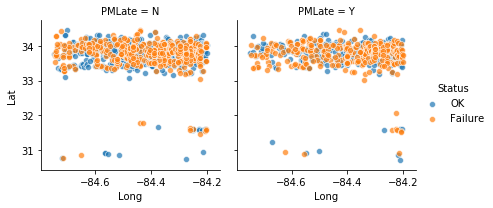

In [72]:
g = sns.FacetGrid(dataset, col="PMLate", hue="Status")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

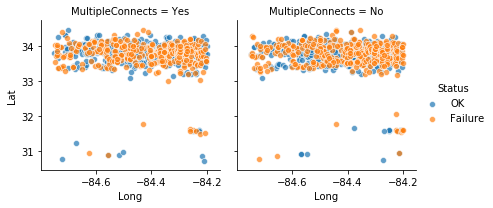

In [78]:
g = sns.FacetGrid(dataset, col="MultipleConnects", hue="Status")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

## Dane nominalne
nominalne = ['Manufacturer','AssetType','AssetCity']

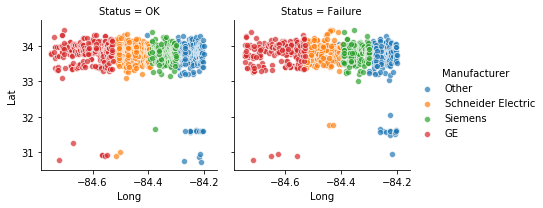

In [79]:
g = sns.FacetGrid(dataset, col="Status", hue="Manufacturer")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

wyraźna zależność pomiędzy poroducentem a położeniem

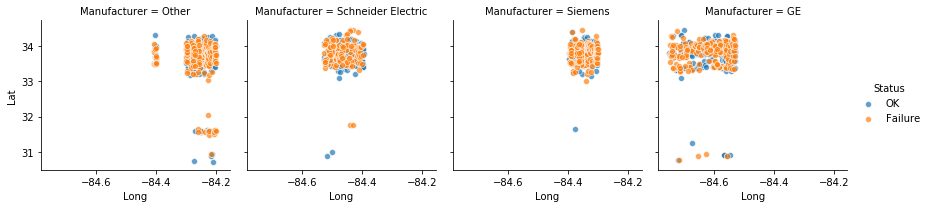

In [80]:
g = sns.FacetGrid(dataset, col="Manufacturer", hue="Status")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

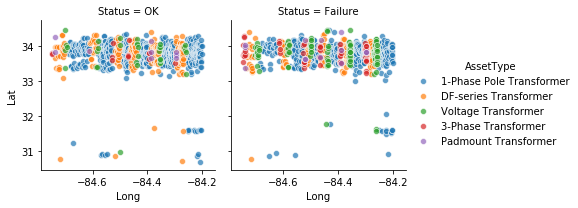

In [81]:
g = sns.FacetGrid(dataset, col="Status", hue="AssetType")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

In [84]:
dataset["Age Group"] = pd.cut(dataset["Age"],[0, 10, 30, 100], precision=0, labels=["Young","Mid-Aged","Old"])

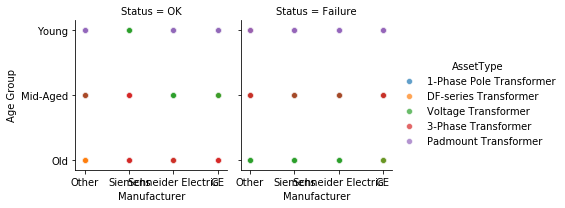

In [89]:
g = sns.FacetGrid(dataset, col="Status", hue="AssetType")
g.map(sns.scatterplot, "Manufacturer", "Age Group", alpha=.7)
g.add_legend()

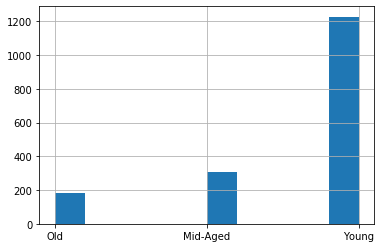

In [91]:
dataset['Age Group'].hist()

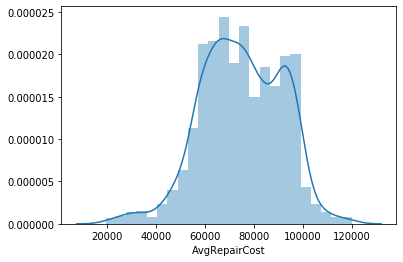

In [92]:
sns.distplot(dane_num['AvgRepairCost'])

In [98]:
dataset["AvgRepairCost Group"] = pd.cut(dataset["AvgRepairCost"],[0, 60000, 80000,90000, 100000000], 
                                        precision=0, labels=["cheap","mid-cheap","expensive","very-expensive"])

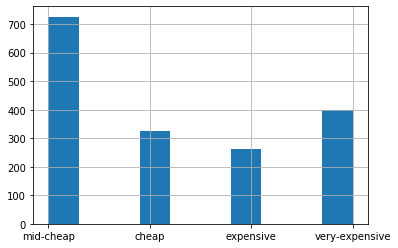

In [99]:
dataset["AvgRepairCost Group"].hist()

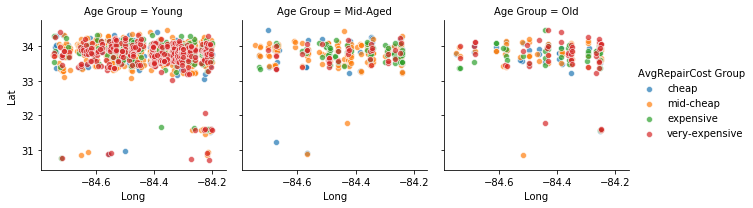

In [102]:
g = sns.FacetGrid(dataset, col="Age Group", hue="AvgRepairCost Group")
g.map(sns.scatterplot, "Long", "Lat", alpha=.7)
g.add_legend()

In [103]:
#Miasto , za dużo błędnych danych, nawet przy podziale duże średnie małe, będą dane źle przypisane, patrz atlanta

In [105]:
def to_lower(x):
    return x.lower()
dataset['AssetCity'] = dataset['AssetCity'].apply(to_lower)

In [107]:
miasta = dict()
for i, element in enumerate(dataset['AssetCity'].value_counts(sort=True)):
    
    miasta[dataset['AssetCity'].value_counts(sort=True).keys()[i]]=element

In [108]:
miasta.keys()

dict_keys(['atlanta', 'marietta', 'decatur', 'alpharetta', 'jonesboro', 'roswell', 'canton', 'fayetteville', 'acworth', 'stockbridge', 'woodstock', 'smyrna', 'riverdale', 'kennesaw', 'griffin', 'ellenwood', 'powder springs', 'douglasville', 'peachtree city', 'college park', 'tucker', 'albany', 'norcross', 'hampton', 'stone mountain', 'forest park', 'newnan', 'dunwoody', 'rex', 'sharpsburg', 'austell', 'clarkston', 'morrow', 'union city', 'bainbridge', 'lithia springs', 'fairburn', 'mableton', 'cumming', 'white', 'east point', 'jasper', 'ball ground', 'chamblee', 'conley', 'doraville', 'mcdonough', 'sandy springs', 'cairo', 'marrietta', 'waleska', 'avondale estates', 'palmetto', 'senoia', 'dawson', 'decator', 'scottdale', 'brooks', 'tyrone', 'altanta', 'hapeville', 'mareitta', 'williamson', 'peach tree city', 'decater', 'fayettville', 'alanta', 'fairmount', 'rydal', 'decauter', 'moreland', 'alphretta', 'duluth', 'peachtree cty', 'powder spring', 'college pk', 'barnesville', 'fayattevill

## Dane
porzadkowe = ['Overloads', 'MilesFromOcean','Repairs']

In [109]:
dane_porz = pd.DataFrame()

In [110]:
map_overloads = {'0-19':0, '20-60':1, '60+':2 }
map_milesfromocean = {'0-30':0, '30-60':1, '60-90':2, 'More than 90':3}
map_repairs = {'Original':0, 'Rebuild+1':1, 'Rebuild+2':2, 'Rebuild+3':3}

In [111]:
for element in porzadkowe:
    dane_porz[element] = dataset[element]

In [112]:
dane_porz['Overloads'] = dane_porz['Overloads'].replace(map_overloads)
dane_porz['MilesFromOcean'] = dane_porz['MilesFromOcean'].replace(map_milesfromocean)
dane_porz['Repairs'] = dane_porz['Repairs'].replace(map_repairs)

In [115]:
dane_porz['Status'] = dataset['Status']

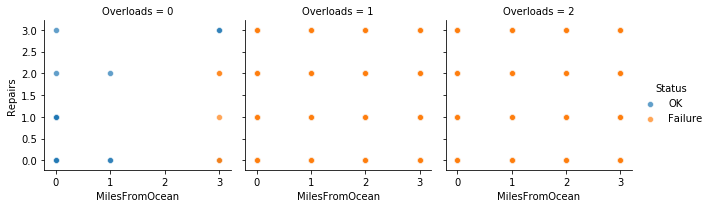

In [120]:

g = sns.FacetGrid(dane_porz, col="Overloads",hue="Status")
g.map(sns.scatterplot, "MilesFromOcean", "Repairs", alpha=.7)
g.add_legend()

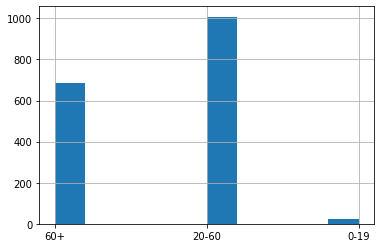

In [121]:
dataset['Overloads'].hist()

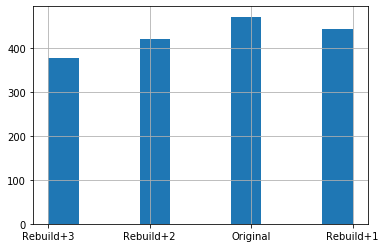

In [226]:
dataset['Repairs'].hist()

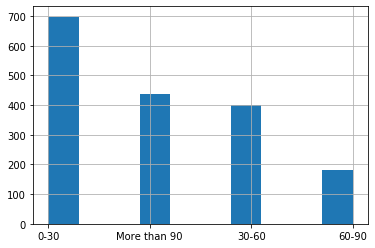

In [122]:
dataset['MilesFromOcean'].hist()

In [123]:
#zamiana grup wiekowych i przedziałów cen naprawy na porządkowe
tmp_dane_porz = pd.DataFrame()

In [124]:
map_age = {"Young":0,"Mid-Aged":1,"Old":2 }
map_repaircost = {"cheap":0,"mid-cheap":1,"expensive":2,"very-expensive":3}

In [125]:
tmp_dane_porz['Age']=dataset['Age Group']
tmp_dane_porz['AvgReapirCost']=dataset['AvgRepairCost Group']

In [126]:
tmp_dane_porz['Age'] = tmp_dane_porz['Age'].replace(map_age)
tmp_dane_porz['AvgReapirCost'] = tmp_dane_porz['AvgReapirCost'].replace(map_repaircost)

## manufakturer i assettype

In [143]:
from sklearn.preprocessing import LabelBinarizer
one_hot = LabelBinarizer()
man = one_hot.fit(dataset['Manufacturer'])
etykiety = list(man.classes_)
man = one_hot.fit_transform(dataset['Manufacturer'])
manufakturer = pd.DataFrame(data=man, columns=etykiety)

In [144]:
at = one_hot.fit(dataset['AssetType'])
etykiety1 = list(at.classes_)
at = one_hot.fit_transform(dataset['AssetType'])
assettype = pd.DataFrame(data=at, columns=etykiety1)

#  Tworzę 2-3 zbiory danych, cechy spisac
-to do:
cechy dla każdego zbioru na liste
hit mapy, dla zbiorów niezależne
wspolny rozkład jak się uda
standaryzacja i rozkład
podział na zbiory uczące i testowe, zapis do plików

In [159]:
lista_kol = [dataset.columns, dane_num.columns, dane_bin.columns, dane_porz.columns,tmp_dane_porz.columns]
for el in lista_kol:
    print(list(el))


['Status', 'PMLate', 'Overloads', 'MilesFromOcean', 'Manufacturer', 'WaterExposure', 'MultipleConnects', 'Storm', 'AssetType', 'Repairs', 'AssetId', 'AssetLocation', 'AssetCity', 'AssetState', 'AssetZip', 'Lat', 'Long', 'AvgRepairCost', 'Age', 'Age Group', 'AvgRepairCost Group', 'Y']
['AssetZip', 'Lat', 'Long', 'AvgRepairCost', 'Age', 'Age_log10', 'Age_log2', 'Age_ln', 'AvgRepairCost_log10', 'AvgRepairCost_sqrt']
['PMLate', 'WaterExposure', 'MultipleConnects', 'Storm']
['Overloads', 'MilesFromOcean', 'Repairs', 'Status']
['Age', 'AvgReapirCost']


In [160]:
#zamiana 1: wartości binominalne na 0 i 1, wartości porządkowe, eliminacja chaosu
zb1=['Status', 'PMLate', 'Overloads', 'MilesFromOcean', 'Manufacturer', 'WaterExposure', 'MultipleConnects', 'Storm', 'AssetType', 'Repairs', 'AssetZip', 'Lat', 'Long', 'AvgRepairCost', 'Age']
#zlogarytmowanie wieku i kosztu naprawy
zb2=['Status', 'PMLate', 'Overloads', 'MilesFromOcean', 'Manufacturer', 'WaterExposure', 'MultipleConnects', 'Storm', 'AssetType', 'Repairs', 'AssetZip', 'Lat', 'Long', 'AvgRepairCost_log10', 'Age_log10']
#koszt naprawy i wiek podzielony na przedziały, zmienne porzadkowe
zb3=['Status', 'PMLate', 'Overloads', 'MilesFromOcean', 'Manufacturer', 'WaterExposure', 'MultipleConnects', 'Storm', 'AssetType', 'Repairs', 'AssetZip', 'Lat', 'Long', 'AvgRepairCost', 'Age']


In [161]:
zb1_ = pd.DataFrame()
zb2_ = pd.DataFrame()
zb3_ = pd.DataFrame()

In [162]:
def zmien_status(x):
    if x == 'OK':
        return 1
    else:
        return 0

In [163]:
dataset['Y'] = dataset['Status'].apply(zmien_status)

In [164]:
zb1_['Status'] = dataset['Y']
zb2_['Status'] = dataset['Y']
zb3_['Status'] = dataset['Y']

In [165]:

for cecha in ['AssetZip', 'Lat', 'Long', 'AvgRepairCost', 'Age']:
    zb1_[cecha] = dane_num[cecha]
for cecha in ['PMLate', 'WaterExposure', 'MultipleConnects', 'Storm']:
    zb1_[cecha] = dane_bin[cecha]
for cecha in ['Overloads', 'MilesFromOcean', 'Repairs', 'Status']:
    zb1_[cecha] = dane_porz[cecha]
for cecha in list(manufakturer.columns):
    zb1_[cecha] = manufakturer[cecha]
for cecha in list(assettype.columns):
    zb1_[cecha] = assettype[cecha]


    


In [166]:
for cecha in ['AssetZip', 'Lat', 'Long', 'AvgRepairCost_log10', 'Age_log10']:
    zb2_[cecha] = dane_num[cecha]
for cecha in ['PMLate', 'WaterExposure', 'MultipleConnects', 'Storm']:
    zb2_[cecha] = dane_bin[cecha]
for cecha in ['Overloads', 'MilesFromOcean', 'Repairs', 'Status']:
    zb2_[cecha] = dane_porz[cecha]
for cecha in list(manufakturer.columns):
    zb2_[cecha] = manufakturer[cecha]
for cecha in list(assettype.columns):
    zb2_[cecha] = assettype[cecha]

In [167]:
for cecha in ['AssetZip', 'Lat', 'Long']:
    zb3_[cecha] = dane_num[cecha]
for cecha in ['PMLate', 'WaterExposure', 'MultipleConnects', 'Storm']:
    zb3_[cecha] = dane_bin[cecha]
for cecha in ['Overloads', 'MilesFromOcean', 'Repairs', 'Status']:
    zb3_[cecha] = dane_porz[cecha]
for cecha in ['Age', 'AvgReapirCost']:
    zb3_[cecha] = tmp_dane_porz[cecha]
for cecha in list(manufakturer.columns):
    zb3_[cecha] = manufakturer[cecha]
for cecha in list(assettype.columns):
    zb3_[cecha] = assettype[cecha]

# zb1_ korelacja, standaryzacja, obraz danych, zapis train-test

In [172]:
zb1_['Status'] = zb1_['Status'].apply(zmien_status)

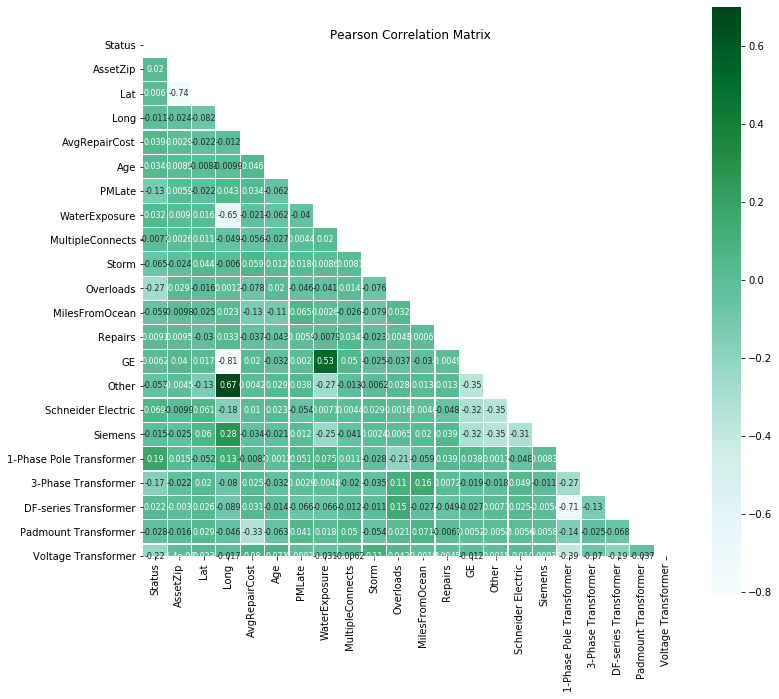

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = zb1_
features = list(zb1_.columns)

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(12, 12))
plt.title('Pearson Correlation Matrix',fontsize=12)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});


In [176]:
zb1_.columns

Index(['Status', 'AssetZip', 'Lat', 'Long', 'AvgRepairCost', 'Age', 'PMLate',
       'WaterExposure', 'MultipleConnects', 'Storm', 'Overloads',
       'MilesFromOcean', 'Repairs', 'GE', 'Other', 'Schneider Electric',
       'Siemens', '1-Phase Pole Transformer', '3-Phase Transformer',
       'DF-series Transformer', 'Padmount Transformer', 'Voltage Transformer'],
      dtype='object')

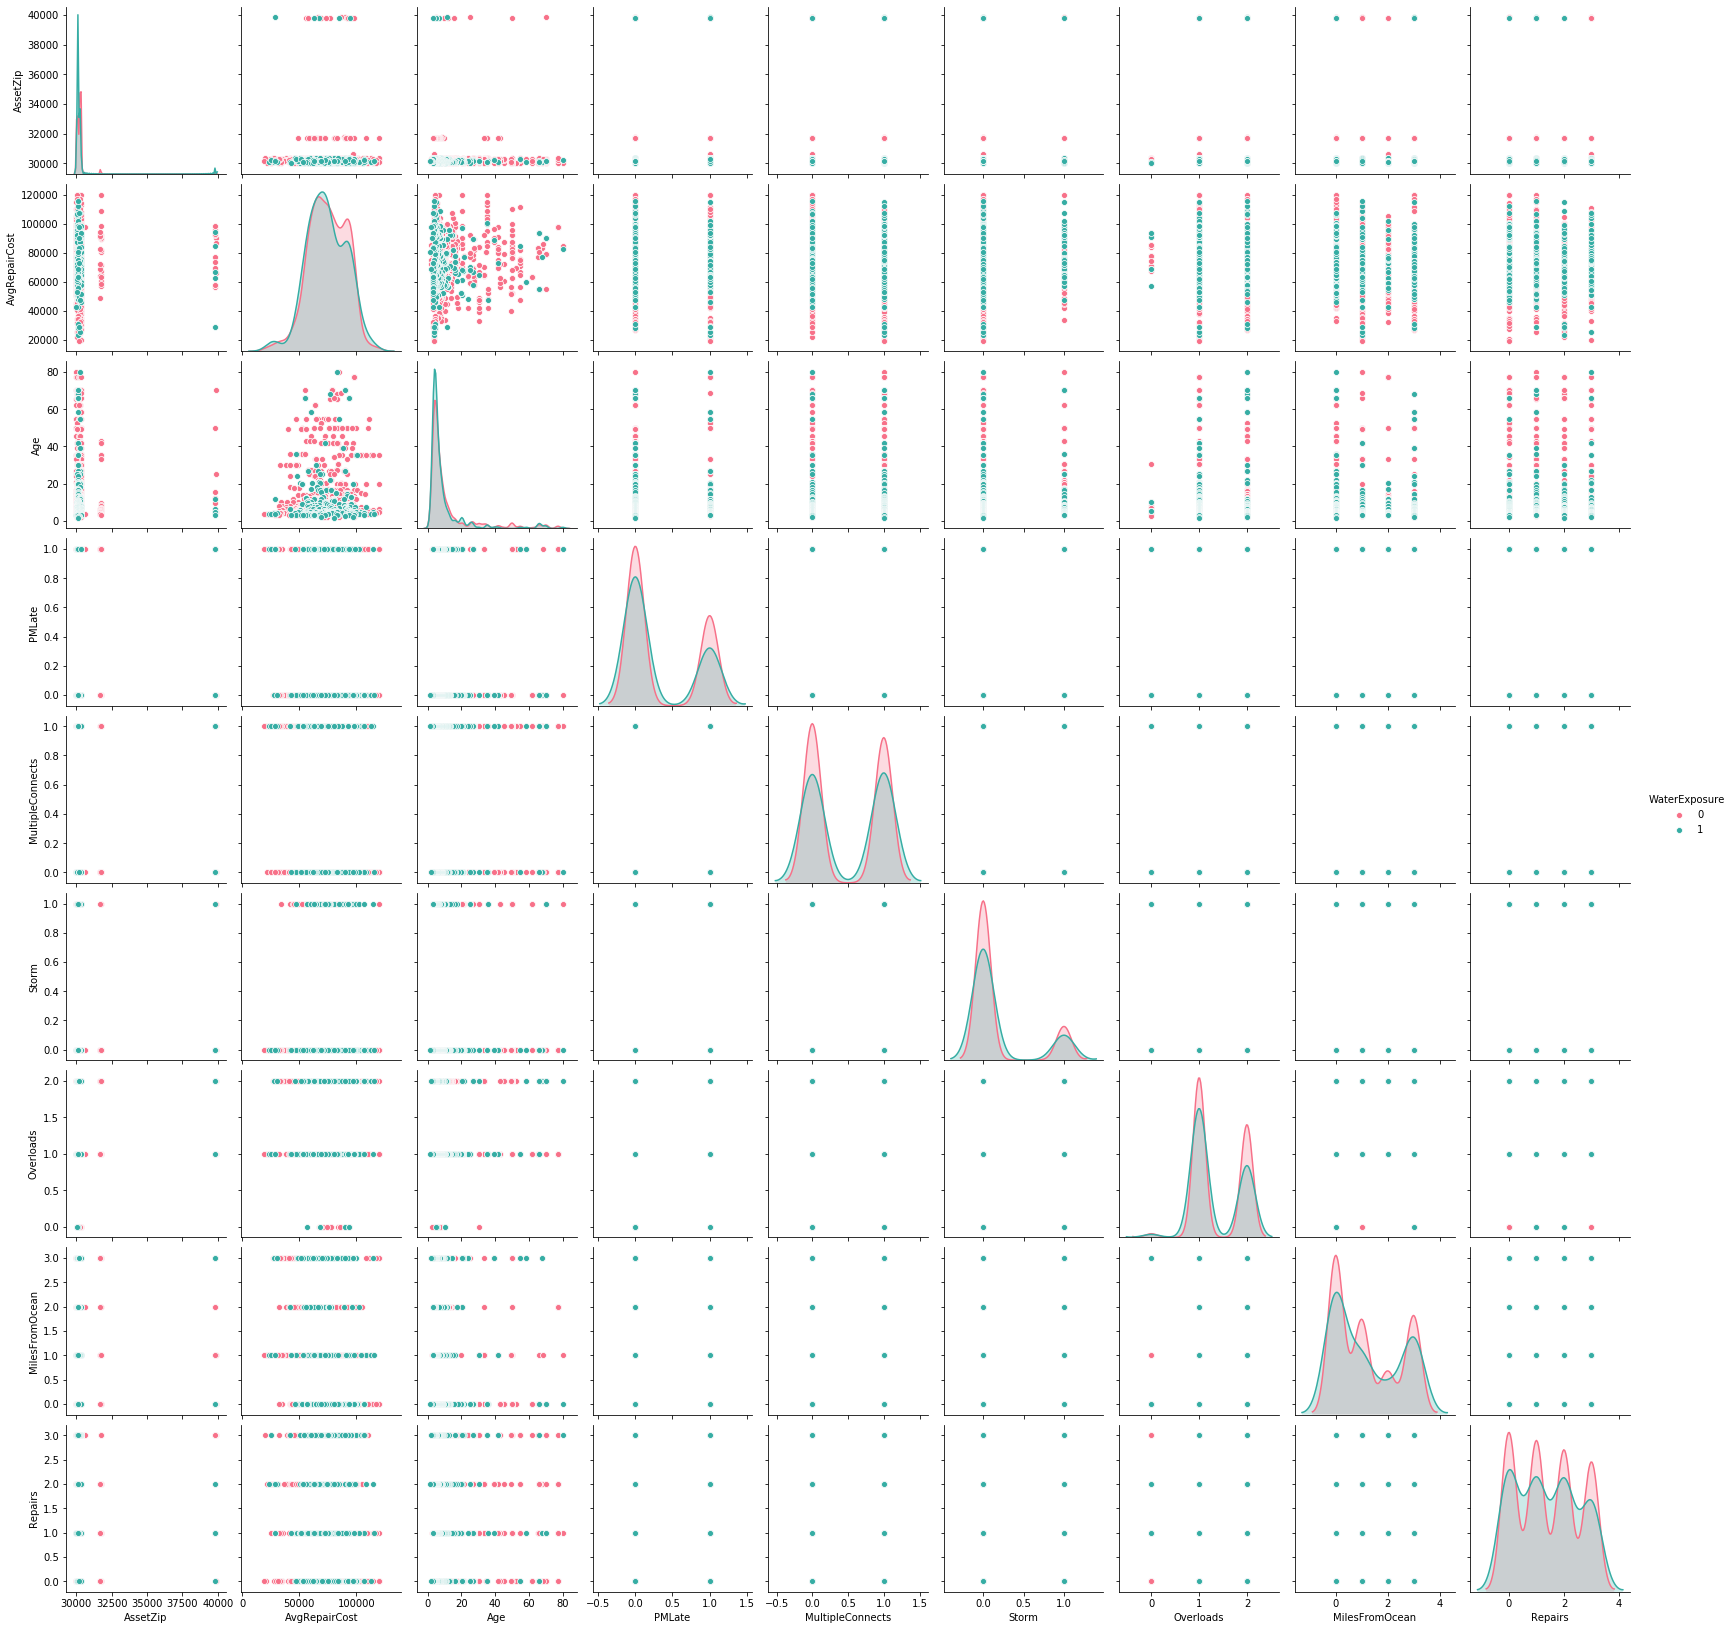

In [179]:
sns.pairplot(x_vars=['AssetZip', 'AvgRepairCost', 'Age', 'PMLate',
       'MultipleConnects', 'Storm', 'Overloads',
       'MilesFromOcean', 'Repairs'], y_vars=['AssetZip', 'AvgRepairCost', 'Age', 'PMLate','MultipleConnects', 'Storm', 'Overloads',
       'MilesFromOcean', 'Repairs'], hue='WaterExposure',data=zb1_, palette='husl')

In [187]:
zb1_.to_excel('zb1.xlsx')

In [189]:
zb2_['Status'] = zb2_['Status'].apply(zmien_status)

In [191]:
zb2_.to_excel('zb2.xlsx')

In [192]:
zb3_['Status'] = zb3_['Status'].apply(zmien_status)

In [193]:
zb3_.to_excel('zb3.xlsx')